# CONDUÇÃO TÉRMICA 1D

*   PET - Física UFRN
*   Petiano : Matheus Felipe Freitas Tomaz
*   Data : 09 de Dezembro de 2022


O objetivo `Notebook` é apresentar uma aplicação direta da equção da difusão para estudar a condução do calor em uma meio material.

Esse Notebook está divido nas sequintes seções :


*   Entendendo o problema
*   Equação da difusão ( Solução Computacional )
*   Densenvolvendo o Algoritmo

## **Pré - requisitos**

É interessante que o leitor tenha lido o `Notebook` [Convecção, difusão e a equação de Burgers](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Convec%C3%A7%C3%A3o%2C%20difus%C3%A3o%20e%20a%20equa%C3%A7%C3%A3o%20de%20Burgers.ipynb) para um melhor entendimento da deduções feitas e dos requerimentos de paramêtros que seram computados.

## **Importando bibliotecas necessárias**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt    

## APRESENTANDO O PROBLEMA

***

![Condução térmica](http://www.geocities.ws/saladefisica8/termologia/conducao30.gif)

***

A figura acima demostra um problema clássico de condução de calor, no qual temos um metal, inicialmente a temperatura ambiente, o qual suas pontas estam dispostas em duas temperaturas diferentes, um lado a $T_1°C$ e outro a $T_2°C$. É experimentalmente conhecido que o gradiente de temperatura ao longo do tempo torna-se linear. Você pode observar esse fenômeno no vídeo : [Condução Térmica - Experiência](https://www.youtube.com/watch?v=30MgD8x66rs).

O fenômeno em questão é regido pela equação da difusão abaixo;

$$ \nabla^2T = \frac{1}{D}\frac{∂T}{∂t} \hspace{0.5cm} (I)$$

*  $T$ : $T(x,t)$
*  $D$ : Difusividade térmica do material

A ideia é resolver computacionalmente essa equação de modo que nosso resultado numérico concorde com os resultados experimentais. Para isso, vamos considerar que a barra é simétrica e que o calor percorre somente ao longo do seu comprimento, de modo que podemos reescrever a Eqs. ( I ) como ;

$$\frac{∂^2T}{∂x^2} = \frac{1}{D}\frac{∂T}{∂t} \hspace{0.5cm} (II)$$

## SOLUÇÃO NUMÉRICA

***

Dado a Eq.(II), podemos aproximar a derivadas pelo método das diferenças finitas, de modo que

$$
\frac{∂^2T}{∂x^2} \approx  \frac{∂}{∂x}\left(\frac{T_{m, n} - T_{m-1, n}}{\Delta x}\right) = \frac{∂}{∂x}\left(\frac{T_{m, n}}{\Delta x}\right) - \frac{∂}{∂x}\left(\frac{T_{m-1, n}}{\Delta x}\right)
$$

Finalmente temos que,

$$
\frac{∂^2T}{∂x^2} \approx \frac{T_{m+1, n} -2T_{m, n} + T_{m-1, n}} {\Delta x^2}\hspace{0.5cm} (III)
$$


$$
\frac{∂T}{∂t} \approx \frac{T_{m, n} - T_{m, n-1}}{\Delta t} \hspace{0.5cm} (IV)
$$

Dispondo III e IV em II, temos que

$$
\frac{T_{m+1, n} -2T_{m, n} + T_{m-1, n}} {\Delta x^2} = \frac{1}{D}\frac{T_{m, n} - T_{m, n+1}}{\Delta t}
$$

Reorganizando os termos

$$
T_{m, n+1} = T_{m, n} + \frac{D\Delta t}{\Delta x^2}\left( T_{m+1, n} - 2T_{m, n} + T_{m-1, n}\right)
$$

Também podemos chegar a mesma solução expandindo a derivada T em série de Taylor em truncando nos termos de segundo ordem. Para melhor entendimento, você pode cusultar o `Notebook` apresentado nos pré - requisitos.

## DESENVOLVENDO O ALGORITMO

***

É fato que olhando para a solução anteriormente desenvolvida precisamos estabelecer alguns parâmentros e condições iniciais para o nosso problema. Para ficar mais condizente com o arranjo experimental do vídeo colocado como referência, tomemos uma barra com comprimento de $20cm$ e que seja feita de aço, cuja a difusividade térmica é de $22.8$ $mm^2/s$.

In [ ]:
L = 0.2 #m
D = 2.28*10**-4

Partindo de que a barra esteja inicialmente a temperatura ambiente e que uma de suas pontas esteja sendo esquentada a $T_1 = 100°C$, podemos estabelecer a condições iniciais.

In [ ]:
dx = 100

x_step = L/dx
t_step = 1e-4 #Para fins de numérico, esse parâmetro precisa ser menor que x_step/D

T = np.zeros(dx)

T[0] = 100
T[1:] = 26

epsilon = t_step/100
fator = (D*t_step)/(x_step**2)

Vamos fazer a medição para 4 intantes de tempo diferentes

In [ ]:
t_1 = 0.01
t_2 = 0.1
t_3 = 5.0
t_4 = 30.0
x = np.linspace(0, L, dx)

Criando o Loop

In [ ]:
t = 0
while t<(t_4 + epsilon):
    Tp = T.copy()
    T[1:-1] = T[1:-1] + fator*(T[2:]  - 2*T[1:-1]  + T[0:-2] ) 
    
    if t<t_1:
        T1 = np.copy(T)
    elif t<t_2:
        T2 = np.copy(T)
    elif t<t_3:
        T3 = np.copy(T)
    elif t<t_4:
        T4 = np.copy(T)
        
    t+=t_step

Plotando o resultado

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(x, T1,  label=f'Tempo : {t_1}')
plt.plot(x, T2, label=f'Tempo : {t_2}')
plt.plot(x, T3, label=f'Tempo : {t_3}')
plt.plot(x, T4, label=f'Tempo : {t_4}')
plt.title('Condução Térmica')
plt.xlabel('Comprimento')
plt.ylabel('Temperatura')
plt.legend()
plt.grid()
plt.savefig('Condução em meio material.png')

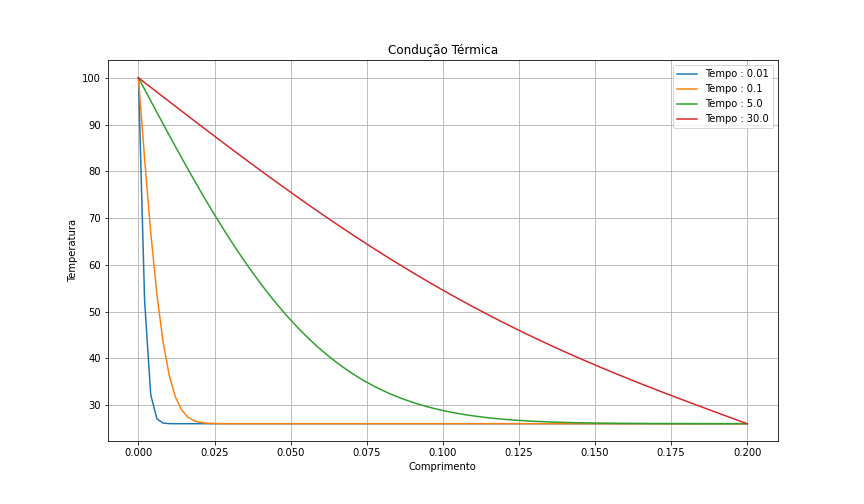

Observando o gráfico do resultado, notamos que quando maior o tempo a relação entre a temperatura e o comprimento torna-se linear. Logo, concluimos nosso modelo explica bem os dados experimentais.

## REFERÊNCIAS

*   [1] *Mark Newman - Computational Physics (2013, University of Michigan)*
*   [2] *GabrielWendell - Convecção, difusão e a equação de Burgers (2021, Pet.py)*